Step 1: Reading the data Reading the data with python


In [92]:
# Reading the dataset
import pandas as pd
import numpy as np
NetflixData=pd.read_csv('/content/drive/MyDrive/Data/NFLX.csv', encoding='latin')
print('Shape before deleting duplicate values:', NetflixData.shape)
# Removing duplicate rows if any
NetflixData=NetflixData.drop_duplicates()
print('Shape After deleting duplicate values:', NetflixData.shape)
# First Print The sample data
# Start observing the Quantitative variables print first 10
NetflixData.head(10)

Shape before deleting duplicate values: (1009, 7)
Shape After deleting duplicate values: (1009, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2 : Problem Statement Denition

In [94]:
# Target Variable: MEDV Predictors/Features: Date, Open, High, Low, Close.
# Look for patterns in open,High and Low prices and predict future stock price trends.
# Whether the stock price goes up for a month and then goes down for another month.
# Predicting the close Price base on Open, High and Low to see if that happen.

Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.

In [95]:
#ML Regression model, as the target variable is Continuous.
NetflixData.nunique()# All the number are Continuous

,0
Date,1009
Open,976
High,983
Low,989
Close,988
Adj Close,988
Volume,1005


Step 4: Looking at the class distribution Target variable distribution to check if the data is balanced or skewed

<Axes: >

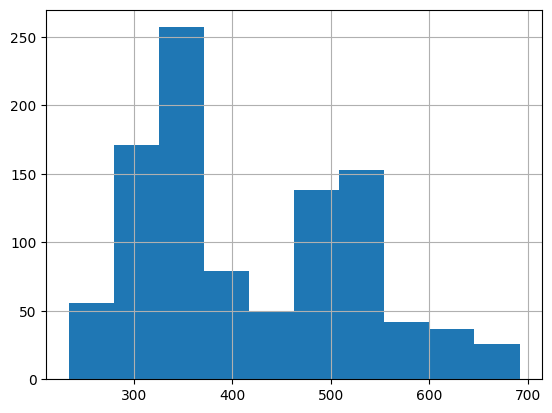

In [96]:
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the Close values
%matplotlib inline
NetflixData['Close'].hist()


Step 5: Basic Exploratory Data Analysis

In [97]:
# Looking at sample rows in the data
# Listing out the heads(Oldest)
NetflixData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [98]:
# Looking at sample rows in the data
NetflixData.tail()# Newest

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [99]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove Qualitative variables which cannot be used in Machine Learning
NetflixData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [100]:
# Looking at the descriptive statistics of the data
#Let them shows all the data (those NAN are the Comprison which in my data they can't be compared)
NetflixData.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


Step 7: Removing Unwanted columns

In [101]:
# I need to drop the Columns that i don't need

NetflixData.drop(columns= ['Adj Close','Volume'])

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using
histograms

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

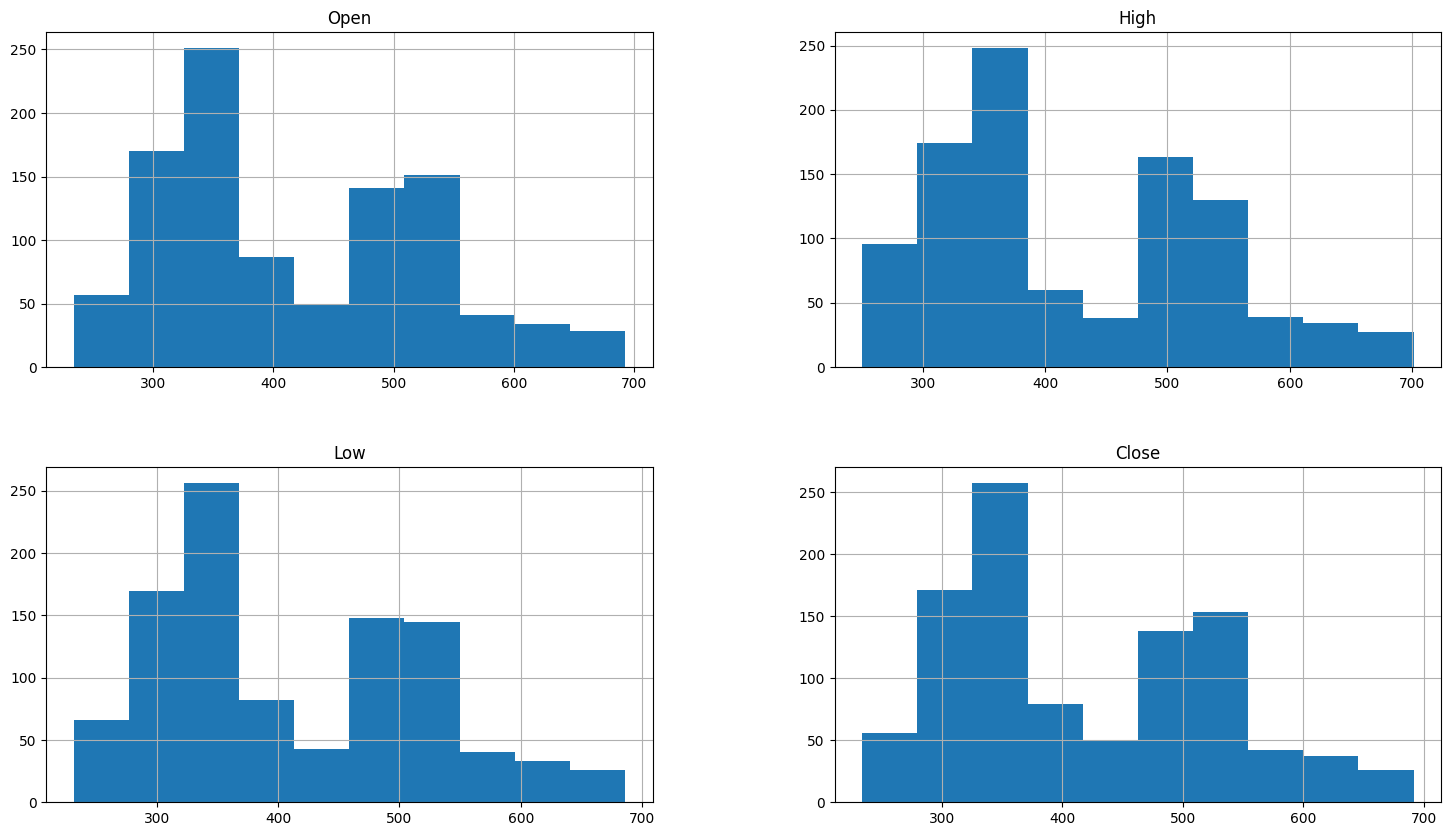

In [102]:
# Plotting histograms of multiple columns together
NetflixData.hist(['Date', 'Open', 'High', 'Low', 'Close'], figsize=(18,10))
#Show the diagram that i want to compare

Step 10: Outlier Analysis


In [103]:
# Based on the data for each stage you can see how Netflix's stock price moves for every 100 rise,
# the less data the faster the stock price rises and the more data the slower the stock price rises.
# 131 Less then 300
NetflixData['Close'][NetflixData['Close']<300].sort_values(ascending=False)

,Close
184,299.829987
383,299.109985
387,298.989990
466,298.929993
530,298.839996
...,...
224,253.669998
3,250.100006
4,249.470001
222,246.389999


In [104]:
# 316 in 100 increase.Compare to <300 it's increase very fast.
NetflixData['Close'][NetflixData['Close']<400].sort_values(ascending=False)

,Close
98,399.390015
104,398.390015
102,398.179993
998,397.500000
549,396.720001
...,...
224,253.669998
3,250.100006
4,249.470001
222,246.389999


547-131 = 316

In [105]:
# 165 compare to <400, it start to increase faster
NetflixData['Close'][NetflixData['Close']<500].sort_values(ascending=False)

,Close
844,499.890015
818,499.549988
836,499.239990
738,499.100006
835,499.079987
...,...
224,253.669998
3,250.100006
4,249.470001
222,246.389999


712 - 547 = 165

In [106]:
# 234 compare to <500 it increase in a bit slow.
NetflixData['Close'][NetflixData['Close']<600].sort_values(ascending=False)

,Close
919,599.059998
906,598.719971
972,597.989990
905,597.539978
985,597.369995
...,...
224,253.669998
3,250.100006
4,249.470001
222,246.389999


946 - 712 = 234

In [107]:
# 297 compare to <600 it increase in  a.
NetflixData['Open'][NetflixData['Open']<700].sort_values(ascending=False)

,Open
956,692.349976
955,691.609985
954,690.000000
942,689.059998
945,685.890015
...,...
5,252.139999
225,250.110001
1,247.699997
223,242.000000


1009 - 712 = 297


Step 11:Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

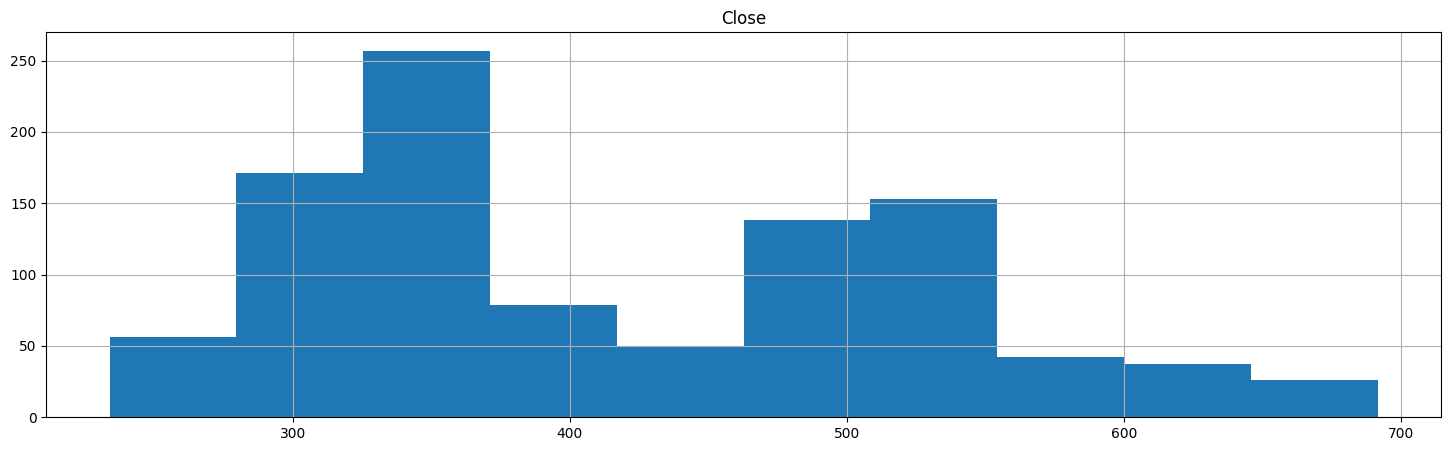

In [108]:
# The distribution of closing prices of Netflix stock.
NetflixData.hist(['Close'], figsize=(18,5))

Step 12: Missing Values Analysis

In [109]:
# Finding how many missing values are there for each column
NetflixData.isnull().sum()# And clearly their are no missing values.

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


Group BY Monthly

In [110]:
# To group data by week in Pandas, one might refer to methods discussed in [1]
# Check if 'Date' column exists in the DataFrame
if 'Date' in NetflixData.columns:
    # Convert the 'Date' column to datetime objects if it's not already
    NetflixData['Date'] = pd.to_datetime(NetflixData['Date'])

    # Set 'Date' as the index
    NetflixData.set_index('Date', inplace=True)

    # Resample the data weekly and calculate the mean of 'Open' for each week
    Monthly_data = NetflixData[['Open','High','Low','Close']].resample('M').mean()

    print(Monthly_data)

else:
    print("Error: 'Date'.")

# reference List [1] "Group by week in pandas," Stack Overflow, 2017. https://stackoverflow.com/questions/45281297/group-by-week-in-pandas.

                  Open        High         Low       Close
Date                                                      
2018-02-28  271.598823  277.357647  266.475293  272.054705
2018-03-31  312.712859  317.424284  305.397143  312.228097
2018-04-30  309.129524  313.808098  302.023807  307.466192
2018-05-31  329.779541  333.969094  327.000000  331.536819
2018-06-30  384.557143  389.790475  378.141427  384.133336
2018-07-31  380.969526  387.179047  374.233330  381.515238
2018-08-31  345.410001  351.161738  340.845217  346.257824
2018-09-30  363.326843  369.201578  356.709998  362.641576
2018-10-31  340.025218  346.519998  328.360431  335.445652
2018-11-30  290.643335  297.460474  282.389999  290.344764
2018-12-31  266.309474  273.846315  258.560000  265.302630
2019-01-31  323.402383  330.171427  318.293809  325.814287
2019-02-28  354.656316  360.118423  350.891049  355.607896
2019-03-31  359.947619  364.034287  354.490476  359.435712
2019-04-30  365.655715  370.220952  360.902380  366.1457

Insert to dataframe

Step 13: Feature Selection (Attribute Selection)


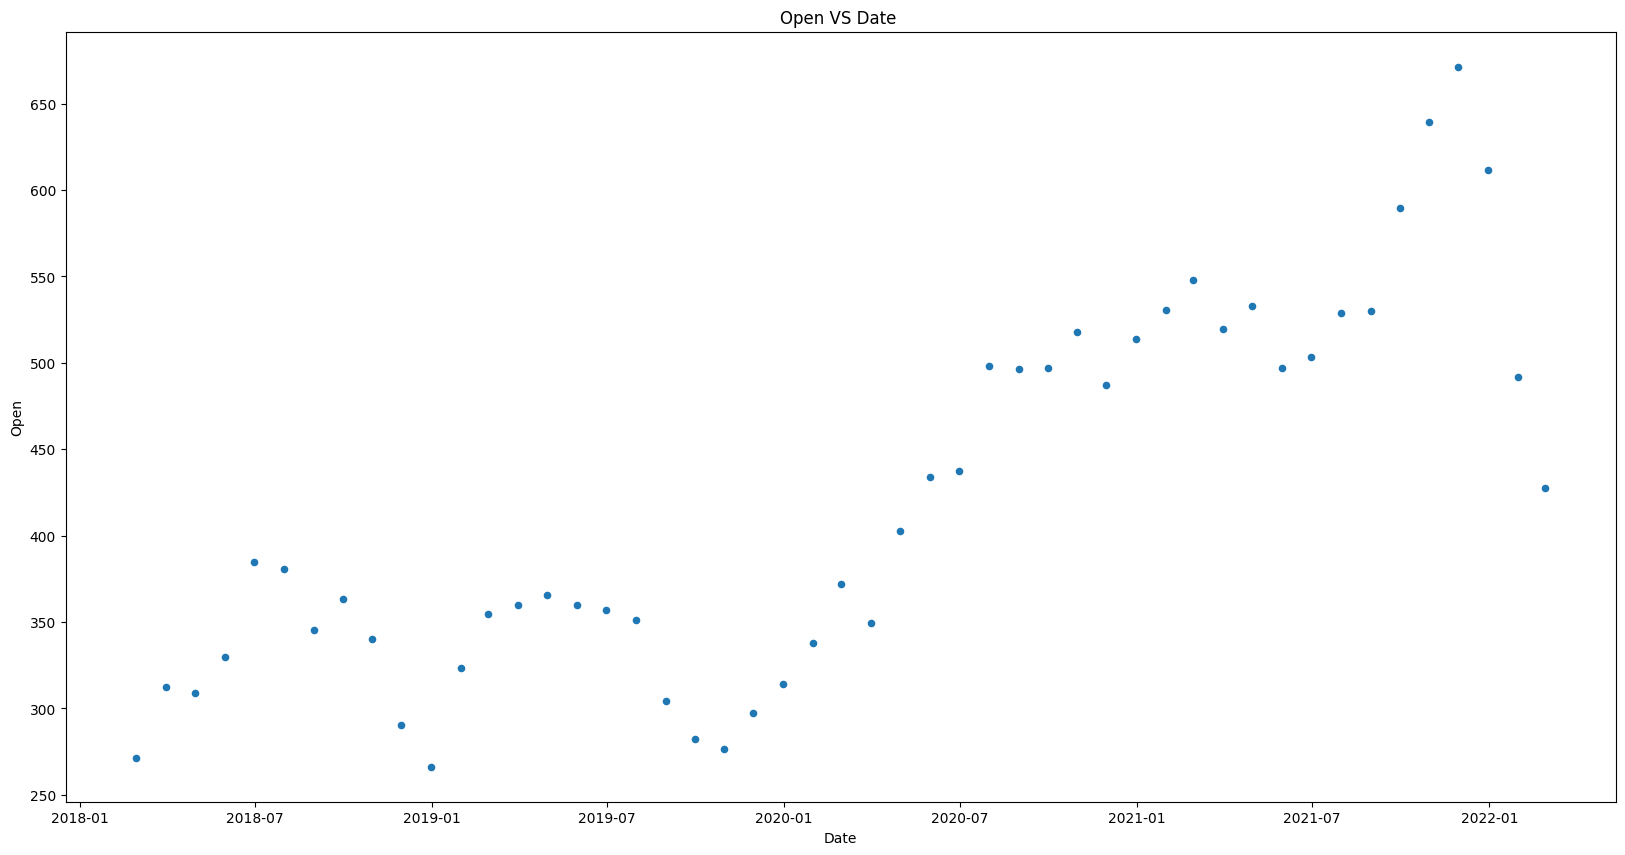

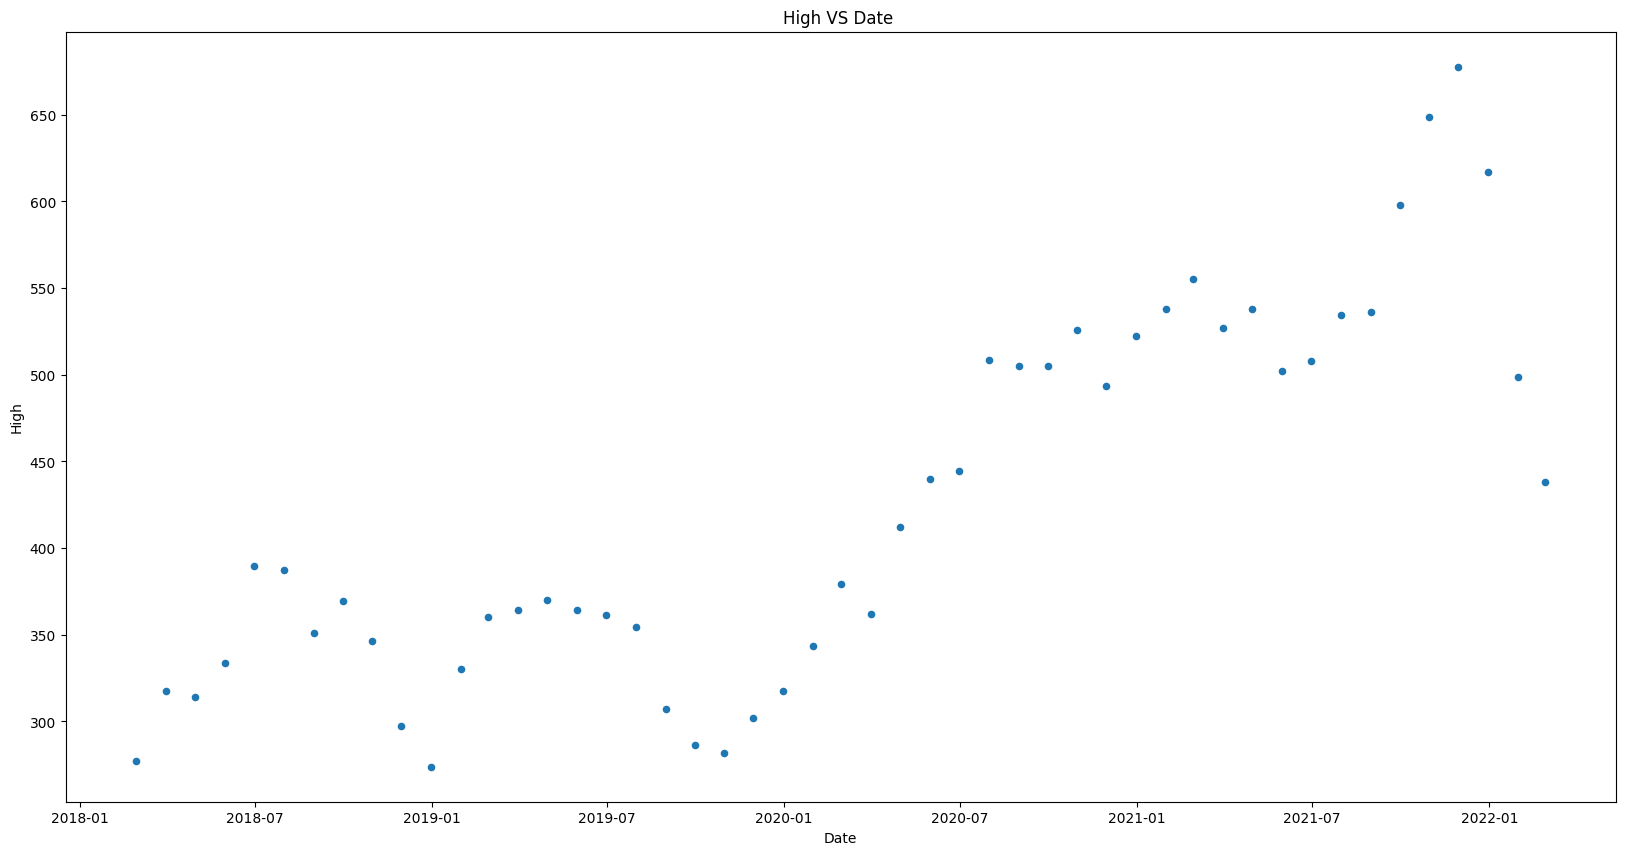

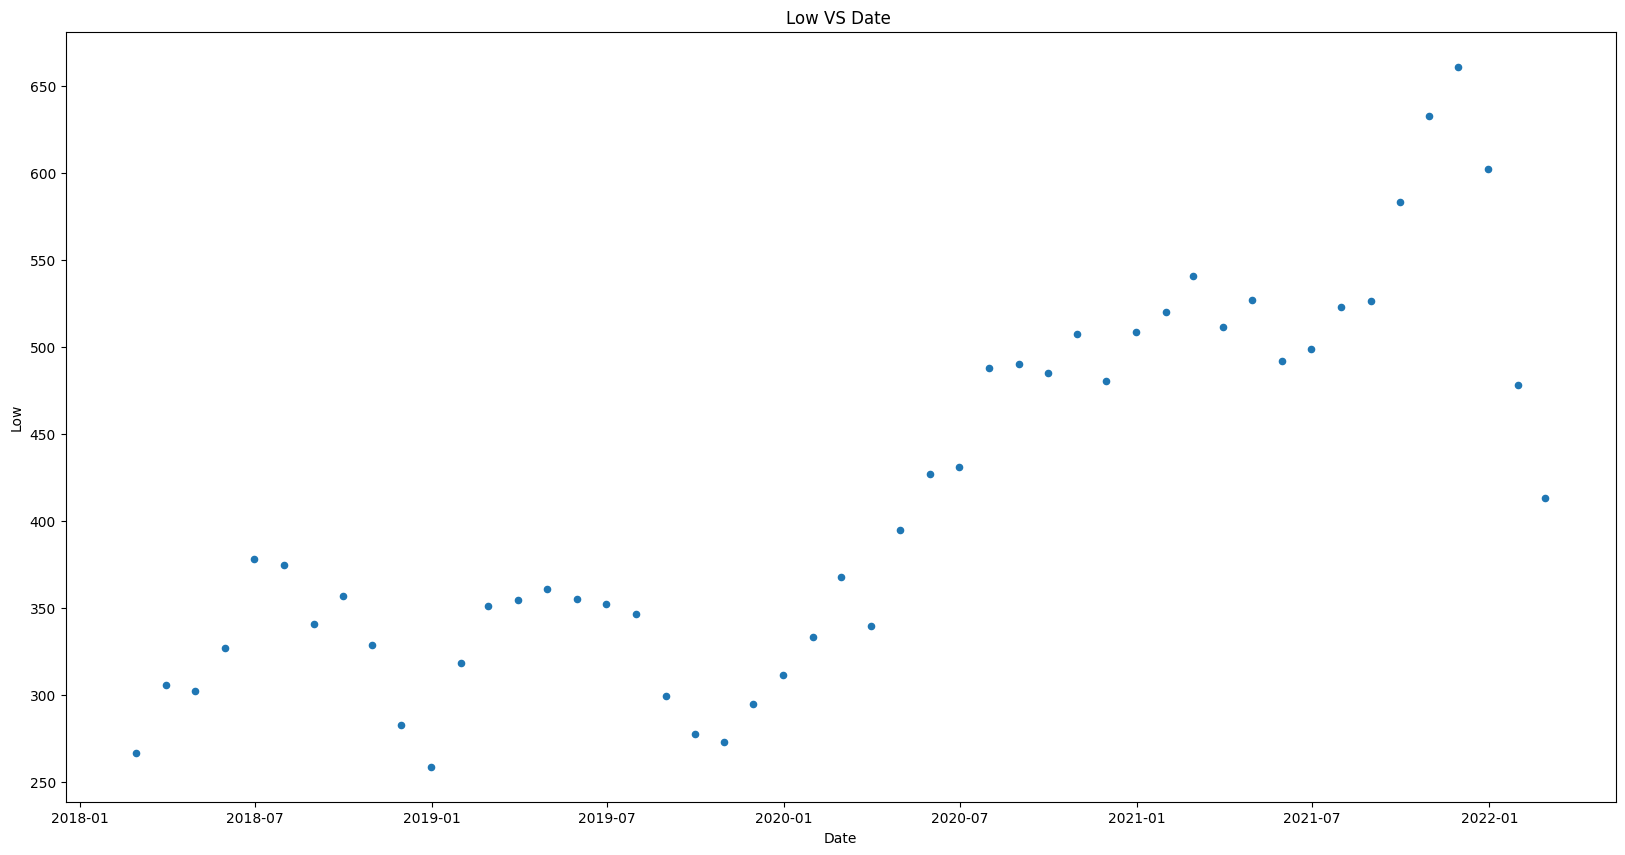

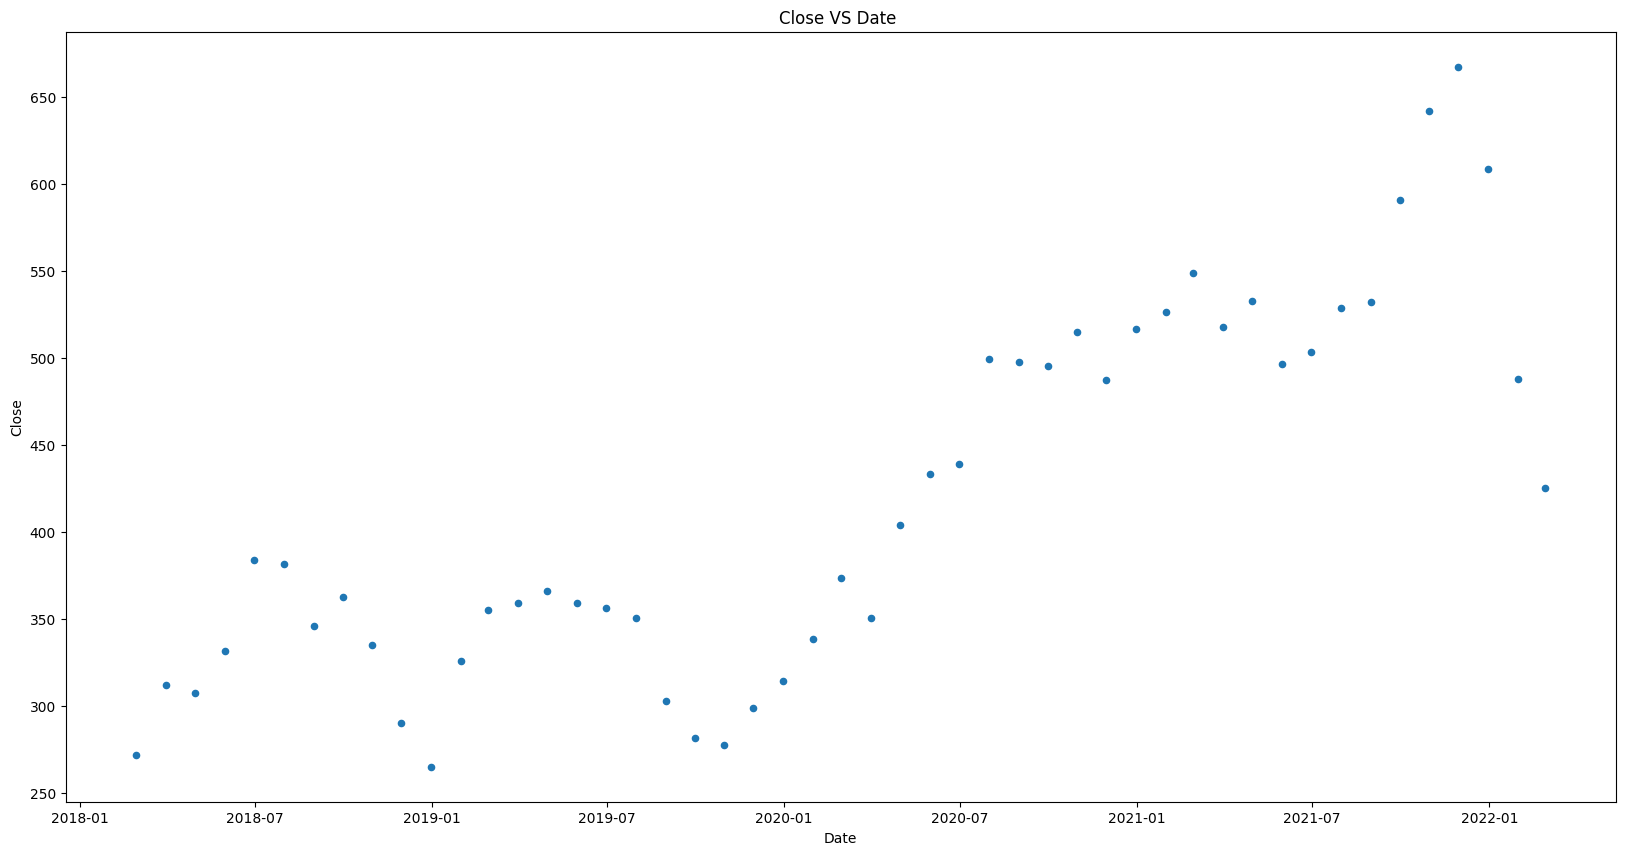

In [111]:
#Continuous Vs Continuous ---- Scatter Plot
ContinuousCols=['Open','High', 'Low', 'Close']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  Monthly_data.reset_index().plot.scatter(x='Date', y= predictor, figsize=(20,10), title=predictor +' VS'+" Date ") # Reset index to make 'Date' a column

Selecting final Predictors/Features for building Machine Learning/AI model

In [112]:
# Select the number I want
SelectedColumns=['Open','High', 'Low', 'Close']

# Selecting final columns
DataForML=NetflixData[SelectedColumns]
DataForML.head()

,Open,High,Low,Close
Date,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995
2018-02-06,247.699997,266.700012,245.000000,265.720001
2018-02-07,266.579987,272.450012,264.329987,264.559998
2018-02-08,267.079987,267.619995,250.000000,250.100006
2018-02-09,253.850006,255.800003,236.110001,249.470001


In [113]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [114]:
# Calculating correlation matrix
ContinuousCols=['Open', 'High', 'Low', 'Close']
# Creating the correlation matrix
CorrelationData=NetflixData[ContinuousCols].corr()
CorrelationData

,Open,High,Low,Close
Open,1.000000,0.998605,0.998508,0.996812
High,0.998605,1.000000,0.998203,0.998551
Low,0.998508,0.998203,1.000000,0.998544
Close,0.996812,0.998551,0.998544,1.000000


Step 17: Data Pre-processing for Machine Learning Model Building or Model Development

In [115]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(NetflixData)
# Adding Target Variable to the data
DataForML_Numeric['Close']=NetflixData['Close']
# Printing sample rows
DataForML_Numeric.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Step 18: Machine Learning Model Development

In [116]:
import pandas as pd
# Printing all the column names for our reference
DataForML_Numeric.columns
pd.Index(['Date','Open', 'High', 'Low','Close'], dtype='object')
# Separate Target Variable and Predictor Variables
TargetVariable='Close'
Predictors=['Open', 'High', 'Low']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


Step 19: Standardization/Normalization of data

In [117]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(706, 3)
(706,)
(303, 3)
(303,)


Step 20: Multiple Linear Regression Algorithm For ML model building

In [118]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])
MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9986731542285744

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           508.0
1  0.592304  0.572101  0.561601  494.730011           493.0
2  0.596449  0.585891  0.589962  500.859985           507.0
3  0.330279  0.303482  0.322451  380.070007           381.0
4  0.195188  0.166985  0.182474  315.100006           319.0
Mean Accuracy on test data: 99.3029073385015
Median Accuracy on test data: 99.47124720149543

Accuracy values for 10-fold Cross Validation:
 [99.21860151 99.21910542 99.19755296 99.4083654  99.47040237 98.9092798
 99.20776329 99.40785386 99.62149833 99.22984505]

Final Average Accuracy of the model: 99.29


Step 21: AdaBoost Algorithm For ML model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.9893407688964735

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           496.0
1  0.592304  0.572101  0.561601  494.730011           493.0
2  0.596449  0.585891  0.589962  500.859985           496.0
3  0.330279  0.303482  0.322451  380.070007           389.0
4  0.195188  0.166985  0.182474  315.100006           317.0
Mean Accuracy on test data: 97.75214009742933
Median Accuracy on test data: 98.10439913592985


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [97.34783653 97.28534829 96.73971998 97.25298175 96.87388772 94.88347177
 98.42072832 97.0922255  98.0909997  93.87633221]

Final Average Accuracy of the model: 96.79


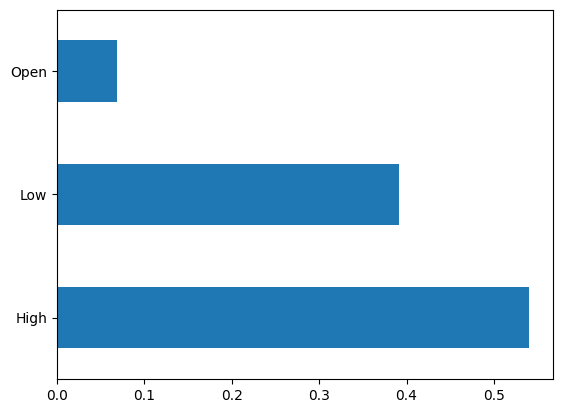

In [119]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9976613969339876

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           509.0
1  0.592304  0.572101  0.561601  494.730011           496.0
2  0.596449  0.585891  0.589962  500.859985           509.0
3  0.330279  0.303482  0.322451  380.070007           386.0
4  0.195188  0.166985  0.182474  315.100006           322.0
Mean Accuracy on test data: 98.56869716791199
Median Accuracy on test data: 98.8354057430968

Accuracy values for 10-fold Cross Validation:
 [98.40322063 98.50561057 98.48597259 98.84648187 98.33407053 97.24234762
 97.95457369 98.81150986 98.98729668 95.64877392]

Final Average Accuracy of the model: 98.12


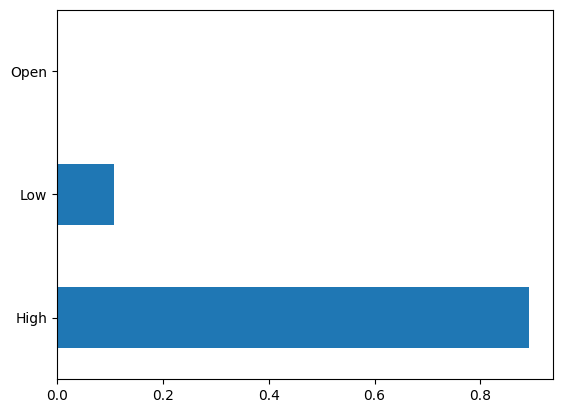

In [120]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date'] = 100 * (abs(
    TestingDataResults['Close'] - TestingDataResults['PredictedClose']) / TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:38:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.9995434001336165

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           508.0
1  0.592304  0.572101  0.561601  494.730011           493.0
2  0.596449  0.585891  0.589962  500.859985           510.0
3  0.330279  0.303482  0.322451  380.070007           386.0
4  0.195188  0.166985  0.182474  315.100006           314.0
Mean Accuracy on test data: 99.0735366085426
Median Accuracy on test data: 99.34123847167325


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:38:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:38:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:38:50] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [98.92809133 98.92258095 98.9963492  99.31086522 99.12503009 98.04559908
 98.86405587 99.12300896 99.47586872 95.57050986]

Final Average Accuracy of the model: 98.64


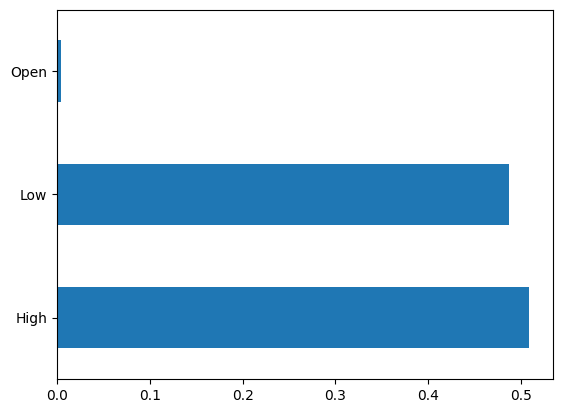

In [121]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction) # TargetVariable is 'Open'

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['Predicted'+ TargetVariable]))/TestingDataResults['Close']) # Use 'Predicted'+ TargetVariable to access the correct column


MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.9893763849517943

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           499.0
1  0.592304  0.572101  0.561601  494.730011           493.0
2  0.596449  0.585891  0.589962  500.859985           506.0
3  0.330279  0.303482  0.322451  380.070007           389.0
4  0.195188  0.166985  0.182474  315.100006           317.0
Mean Accuracy on test data: 97.69974573698207
Median Accuracy on test data: 98.08989984682428


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [97.22637327 97.31151514 96.78615024 97.25319837 96.87601206 94.43660063
 98.3903589  97.10077781 98.15046542 93.81357122]

Final Average Accuracy of the model: 96.73


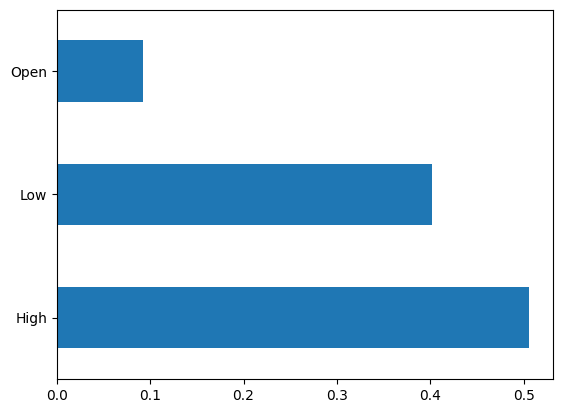

In [122]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [123]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9989790942951331

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           505.0
1  0.592304  0.572101  0.561601  494.730011           488.0
2  0.596449  0.585891  0.589962  500.859985           507.0
3  0.330279  0.303482  0.322451  380.070007           382.0
4  0.195188  0.166985  0.182474  315.100006           321.0
Mean Accuracy on test data: 99.05814068358532
Median Accuracy on test data: 99.31442221288626

Accuracy values for 10-fold Cross Validation:
 [98.95644363 99.0577121  98.9613391  99.27343742 99.14276876 98.36592285
 98.83590812 99.26087998 99.45536694 95.95525821]

Final Average Accuracy of the model: 98.73


Support Vector Machine (SVM) Regressor

In [124]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9848756652044762

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low       Close  PredictedClose
0  0.577471  0.576875  0.587917  509.640015           491.0
1  0.592304  0.572101  0.561601  494.730011           489.0
2  0.596449  0.585891  0.589962  500.859985           495.0
3  0.330279  0.303482  0.322451  380.070007           385.0
4  0.195188  0.166985  0.182474  315.100006           330.0
Mean Accuracy on test data: 97.37754351648478
Median Accuracy on test data: 97.57053406234954

Accuracy values for 10-fold Cross Validation:
 [97.88638675 98.16071876 98.13584888 98.36011165 97.40298007 98.57742851
 98.33862382 97.764735   97.7962814  96.47717868]

Final Average Accuracy of the model: 97.89


Compare to Support Vector Machine (SVM) Regressor,Step 20: Multiple Linear Regression Algorithm For ML model building, Step 21: AdaBoost Algorithm For ML model building, Decision Trees (Multiple if-else statements!),  Xtreme Gradient Boosting (XGBoost), # Adaboost (Boosting of multiple Decision Trees), kNN. The Highest average is Multiple Linear Regression Algorithm For ML model building.Which is 99.27.

Step 21: Model Deployment

In [128]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Close']

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Open','High','Low']

X = DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1009, 3)
(1009, 1)


Cross validating the final model accuracy with less predictors

In [129]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:41:44] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:41:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:41:46] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:41:47] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [86.7528039  89.13294601 86.14987026 89.48958467 89.38570582 88.45906922
 95.38040162 95.22415542 94.03363549 85.95373161]

Final Average Accuracy of the model: 90.0


Step 22: Retraining the final model using 100% data

In [130]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:41:52] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Step 23: Save the model as a serialized file which can be stored anywhere

In [131]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


END OF PROGRAMMING PROJECT